# Variáveis Aleatórias Discretas
**Objetivo da aula**: ao fim desta aula, o aluno será capaz de diferenciar amostras de populações, e usar probabilidades estimadas para descrever populações no caso discreto.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Texto introdutório

Até o momento, nós estamos assumindo que nossos dados representam toda a população que nos interessa: temos dados de todos os países do mundo, ou então de todos os clientes do iFood, ou então sobre todas as medições de uma estação metereológica. Em várias situações, isso é absolutamente plausível (afinal, nós mesmos conseguimos esses dados), mas em algumas situações é absolutamente infactível. Um exemplo disso é quando fazemos um teste em pequena escala para avaliar um tratamento, uma intervenção de marketing ou uma nova interface de um sistema. Nesse caso, nossos dados representam somente uma *amostra* de nossa *população*. 

A consequência disso é que não somos mais capazes de calcular diretamente a média $\mu$ e o desvio padrão $\sigma$. Ao invés disso, precisamos usar as estimativas correspondentes $\bar{X}$ e $s$. O cálculo deles é bastante semelhante às contrapartidas populacionais, exceto pelo denominados $N-1$ em $s$:

Conceito | População | Amostra
--- | ---  | --- 
Definição | Conjunto de todos os indivíduos de um determinado grupo | Conjunto com alguns elementos de uma população, escolhidos (ou *amostrados*) aleatoriamente
Centralidade | Média populacional:  $\mu = \sum_{n=1}^N{x_n}/N$ | Média amostral:  $\bar{X} = \sum_{n=1}^N{x_n}/N$ 
Dispersão | Desvio padrão populacional: $\sigma = \sqrt{\sum_{n=1}^N ({x_n}-\mu)^2/N}$ | Desvio padrão amostral: $s =  \sqrt{\sum_{n=1}^N ({x_n}-\bar{X})^2/(N-1)}$

A *interpretação* deles, porém, é bastante diferente. Quando usamos $\mu$, temos os dados de toda nossa população. Quando usamos $\bar{X}$, porém, a informação é somente uma *estimativa* de $\mu$. Por exemplo: não podemos (em princípio) medir a altura de todas as pessoas do mundo para calcular a média de altura da humanidade (que seria $\mu$), mas podemos calcular a média de altura de algumas pessoas (gerando $\bar{X}$) e então usar esse valor como uma estimativa de $\mu$. O mesmo vale para a relação entre $\sigma$ e $s$.

**importante: por padrão, o `pandas` calcula a média e o desvio padrão *amostrais*.**

# Exercício 1
*Objetivo: descrever a diferença entre as médias populacional e amostral*

O código abaixo usa os dados que temos sobre o florestamento em países. Nele, calculamos a média populacional $\mu$ e a média amostral $\bar{X}$ para uma amostra de $N$ países em 2020.

1. Por que $\mu$ não muda quando executamos o código novamente?
<strong>Pois a média da população, ou seja, todo os dados disponiveis</strong>
1. Por que $\bar{X}$ muda? 
<strong>Pois ele pega aleatoriamente 5 amostras e calcula a média em cima disso</strong>
1. Faça um histograma dos valores de $\bar{X}$ se executarmos o processo de amostragem 1000 vezes.
1. Faça um outro histograma para $\bar{X}$, também executando o processo de amostragem 1000 vezes, mas agora alterando o valor de $N$ para 30. Qual foi a diferença observada?
<strong>O desvio diminui quando aumenta o "N", e vai se aproximando cada vez mais da média populacional</strong>

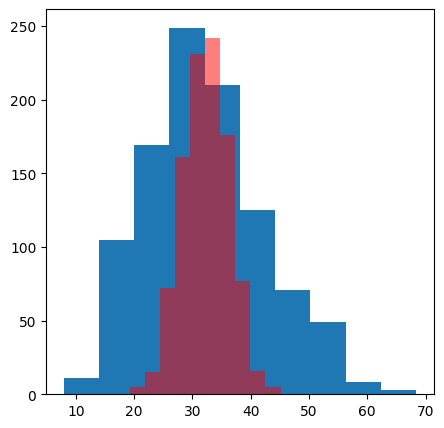

32.08994149987757 [22.575410581872344, 31.415739073187318, 34.813878607506844, 28.06312204932375, 29.60289503044662, 44.85267059562774, 36.4558500829321, 41.75153428623317, 33.27206374714212, 34.06582883234341, 44.705577208814596, 28.724660228917447, 49.22155556962216, 33.27814706983582, 27.242255794008408, 27.783475780633648, 30.744051806328777, 30.037801372342038, 24.629747169922517, 17.87823831705027, 28.90162636284939, 24.810529186217273, 33.14252692964782, 22.108370285548332, 20.334396092688156, 39.84211273355104, 22.91935963641435, 47.38449447210095, 35.28322082643694, 29.794071871370228, 49.99696626085123, 42.33962767675566, 45.85857542224328, 12.095212370526413, 26.387807005367975, 28.17228552004202, 36.20865531210858, 28.803471710465253, 43.11545830345834, 46.04195590395746, 47.91076711299768, 28.87188404114544, 18.808648782217922, 15.831011215224914, 39.88209633198266, 27.646639101903663, 32.28945639949794, 31.0490532409682, 24.615319428067487, 22.117731429035217, 43.27327703

In [59]:
df_area_florestal = pd.read_csv('dados/WorldBank/API_AG.LND.FRST.ZS_DS2_en_csv_v2_3731376.csv', skiprows=3)
mu = df_area_florestal['2020'].mean()

N = 5

hist = []
hist2 = []

for i in range(1000):
    hist.append(df_area_florestal['2020'].sample(N).mean())
    hist2.append(df_area_florestal['2020'].sample(N + 25).mean())

plot_series = pd.Series(hist)
plot2_series = pd.Series(hist2)

plot_series.plot.hist(figsize=(5, 5), alpha=1,)
plot2_series.plot.hist(figsize=(5, 5), alpha=0.5, color="red")
plt.ylabel('')
plt.xlabel('')
plt.show()

print(mu, hist)

# Exercício 2
*Objetivo: estimar probabilidades baseado num modelo*

Se você chegou até aqui, então sabe que:

* Em algumas situações, nós não temos acesso a toda a população de interesse - somente a uma amostra dela,
* Quanto maior é a amostra (ou seja, quanto maior é $N$), menor é o desvio padrão da estimativa $\bar{X}$.

Porém, em contraposição a isso, existem fenômenos que são tão simples que conseguimos fazer modelos matemáticos muito precisos para eles. Um desses fenômenos é o de jogar uma moeda e verificar se saiu "cara" ou "coroa". É claro que a moeda, ao ser jogada, obedece fenômenos da física, propagações de momentos de inércia, colisões semi-elásticas, etc., e isso determina sua trajetória. Porém, esses fatores todos são tão delicados, incontroláveis e complexos que geralmente atribuímos seus impactos ao mero acaso, ou "chance".

É muito provável (com o perdão do trocadilho) que você não vá passar horas jogando moedas por aí. Porém, há outros fenômenos que são muito parecidos com jogar uma moeda. Por exemplo:

* Conversão de clientes: se um cliente visita seu site, ele pode ou não clicar em "comprar"
* Resultado esportivo: se um time de futebol joga uma partida, ele pode ou não vencer
* Fraudes de cartão de crédito: se uma compra é feita com cartão de crédito, ela pode ou não ser uma fraude

## Distribuições

Quando temos fenômenos que são dependentes do acaso para acontecerem (e veja, acaso, neste caso, significa "fatores que podem até ser causais, mas variam de forma incontrolável"), dizemos que eles têm uma "probabilidade" de acontecer. Voltando à nossa moeda, dizemos que há uma *probabilidade* de sair cara e uma *probabilidade* de sair coroa.

O ato de jogar a moeda significa *realizar um experimento*. A soma das probabilidades de todos os resultados possíveis de um experimento é sempre igual a 1 (ou 100%). Então, se nossa moeda está bem balanceada, a probabilidade de sair cara é a mesma probabilidade de sair coroa, ambas iguais a $0.5$ e somando um total de 1, ou:

$$
P(\text{cara})=0.5 \\
P(\text{coroa})=0.5
$$

Nosso modelo matemático mostra como essa probabilidade total (de 1) se *distribui* entre os resultados possíveis. Por isso, esse tipo de modelo é chamado de *distribuição*. Como o resultado da jogada é aleatório, ele é chamado de *variável aleatória*.

## Enunciado do exercício

Uma das grandes rivalidades da NBA é entre os times do Chicago Bulls (que já teve o Michael Jordan) e o Los Angeles Lakers (que já teve o Magic Johson). De acordo com [dados históricos](https://www.landofbasketball.com/head_to_head_gl/lakers_vs_bulls_game_log_season.htm), historicamente (desde 1966) os times jogaram 161 vezes, com 66 vitórias dos Bulls e 95 vitórias dos Lakers. Se escolhermos um jogo aleatório entre todos esses da série histórica, qual é a probabilidade de escolhermos um jogo em que há vitória dos Bulls?

# Exercício 3
*Objetivo: calcular a esperança e a variância para distribuições e comparar com resultados empíricos*

## Propriedades de distribuições

Assim como tínhamos a média e o desvio padrão em populações e amostras, podemos calcular medidas de centralidade e dispersão para distribuições:

* Centralidade: a *esperança* $E(X)=\sum_{n=1}^N P(x_n) x_n$
* Dispersão: a *variância* $\text{Var}(X) =  \sum_{n=1}^N P(x_n) ({x_n}-E(X))^2$

Lembrando que o desvio padrão é simplesmente a raiz quadrada da variância!

### EXEMPLO: Cálculo da média e da variância em uma jogada de moedas

Por exemplo, para o caso da moeda, se associarmos que cara=0 e coroa=1, então temos que os resultados possíveis de um experimento são $x_1=\text{cara}=0$ e $x_2=\text{cara}=1$. Portanto, podemos calcular a esperança: 

$$
\begin{align*}
E(X) &= \sum_{n=1}^N P(x_n) x_n\\ 
&= P(\text{cara}) \times 0 + P(\text{coroa}) \times 1 \\
&= 0.5 \times 0 + 0.5 \times 1 \\
&= 0.5
\end{align*}
$$

e a variância:

$$
\begin{align*}
\text{Var}(X) &=  \sum_{n=1}^N P(x_n) ({x_n}-E(X))^2\\ 
&= P(\text{cara}) \times (0-0.5)^2 + P(\text{coroa}) \times (1-0.5)^2 \\
&= 0.5 \times (-0.5)^2 + 0.5 \times (0.5)^2 \\
&= 0.5 \times 0.25 + 0.5 \times 0.25\\
&= 0.25
\end{align*}
$$

## Enunciado do exercício

Uma casa de apostas da NBA está recebendo apostas para o jogo Bulls vs. Lakers. As condições da aposta são as seguintes:

* Se o apostador escolher os Bulls, e os Bulls vencerem, ele recebe R$2,00 para cada real apostado;
* Se o apostador escolher os Lakers, e os Lakers vencerem, ele recebe R$1,40 para cada real apostado;
* O apostador não recebe de volta o valor apostado, isto é, o retorno é somente o que recebeu de volta por sua aposta.

(a) Qual é a expectativa de retorno por real apostado para cada um dos casos (apostar nos Bulls ou nos Lakers)

(b) Qual é a variância e o desvio padrão do retorno esperados para apostadores dos Bulls? E dos Lakers?






In [67]:
# Resolva o exercício aqui

p_bulls = 66 / 161
p_lakers = 66 / 161

esp = 0.4 * 2 + 0.6 * 1.4

var = (0.4 * ((2 - esp) ** 2)) + (0.6 * ((1.4 - esp) ** 2))

# esperanca é a media do que se espera receber depois de "tentar" infinitas vezes (ex: esperanca a cima diz respeito a quanto se espera receber depois de apostar x valor infinitas vezes no bulls e lakes)
# variancia indica a dispersão dos seus dados que foram utilizados para calcular a esperaça (como se fosse o desvio padrao ("devio padrao = 1 metro / var = 1 km"))



# Em resumo, a variância é uma medida de quão distantes os valores de uma variável aleatória estão da sua média (esperança). Quando a variância é baixa, os valores tendem a estar próximos da média, enquanto uma variância alta indica uma dispersão maior em torno da média. Portanto, a variância fornece informações importantes sobre a variabilidade dos dados em relação à sua média, e a esperança é o valor médio esperado dessa variável. 






var

0.08640000000000003

# Exercício 3
*Objetivo: aplicar o conceito de valor esperado e variância para analisar uma intervenção de marketing*

Um website tem uma taxa de conversão típica de 10%, com variações para mais ou para menos. Foi feita uma intervenção de marketing para melhorar a usabilidade e a taxa de conversão na semana seguinte foi de 12%, aumentando as vendas em R$100.000,00.

Essa alteração na taxa de conversão representa uma alteração de mais de um desvio padrão em relação à condição inicial, ou trata-se de uma alteração que pode ser fruto da variabilidade natural das taxas de conversão do website?

In [26]:
# Resolva seu exercício aqui

# Exercício 4
*Objetivo: calcular a esperança e variância da soma de variáveis aleatórias independentes*

## Somando variáveis aleatórias independentes

Algumas variáveis aleatórias são chamadas de "independentes". Duas variáveis são independentes entre si quando realizar o experimento sobre uma delas não tem nenhum impacto nas probabilidades da outra.

Duas variáveis independentes são, por exemplo, duas jogadas de moeda: a segunda jogada de moeda não é influenciada de forma alguma pela primeira jogada.

Duas variáveis dependentes são, por exemplo, duas ações do mesmo setor na bolsa de valores: ao analisar o movimento de uma delas, é possível ter informações sobre o movimento da outra.

Além de jogadas de moedas, também costumam ser indepentes: clientes (especialmente em lojas online), participantes de pesquisas e desastres naturais como terremotos.

Quando somamos duas variáveis independentes, temos que:

* $E(X+Y) = E(X) + E(Y)$
* $\text{Var}(X+Y) = \text{Var}(X) + \text{Var}(Y)$

### Exemplo

Numa casa de apostas, eu jogo uma moeda. Caso saia cara, ganho 1 real. Caso saia coroa, perco 1 real. Nesse caso, ao jogar a moeda uma vez, tenho:

$$E(X) = 1 \times 0.5 + (-1) \times 0.5 = 0$$

e

$$\text{Var}(X) = 0.5 \times 1^2 + 0.5 \times (-1)^2 = 1$$

Caso eu jogue duas moedas, tenho:

$$E(X+Y) = E(X) + E(Y) = 0 + 0 = 0$$

e 

$$\text{Var}(X+Y) = \text{Var}(X) + \text{Var}(Y) = 1 + 1 = 2$$

## Enunciado do exercício

Sabendo das probabilidades de apostas de basquete da NBA, calcule o retorno esperado e a variância para um jogador que decide apostar nos Bulls em 10 jogos consecutivos.

# Exercício 5
*Objetivo: estimar o custo envolvido em seguros e entender o modelo estatístico das seguradoras*


Em maio de 2023, [houve 6.869 casos de roubos de automóveis](https://olhardigital.com.br/2023/07/11/carros-e-tecnologia/roubos-e-furtos-de-carros-crescem-23-em-sp-saiba-quais-sao-os-mais-visados/#:~:text=os%20mais%20visados-,Roubos%20e%20furtos%20de%20carros%20crescem%2023%25%20em%20SP%3B%20saiba,quais%20s%C3%A3o%20os%20mais%20visados&text=O%20n%C3%BAmero%20de%20roubos%20e,No%20total%2C%20foram%206.869%20casos.) em São Paulo. Também, houve [209 acidentes](https://g1.globo.com/sp/sao-paulo/noticia/2023/04/24/cidade-de-sp-registra-no-1-trimestre-de-2023-maior-numero-de-mortes-no-transito-dos-ultimos-sete-anos.ghtml) no primeiro semestre de 2023. Segundo [dados de 2021](https://garagem360.com.br/carros-e-motos-em-sp-descubra-quantos-milhoes-circulam-conforme-pesquisa/), há  8,8 milhões de automóveis na cidade de São Paulo. Com medo do roubo, a maior parte das pessoas faz seguro.

Para mantermos nossos cálculos mais simples, vamos assumir que o seguro significa que, caso o carro seja roubado ou sofra um acidente, ele será inteiramente substituído pela seguradora. Todos os cálculos realizados aqui serão para o período de um mês, assumindo os dados acima, e também assumindo que um cliente só pode sofrer um sinistro nesse mês.

Usando dados aproximados (se quiser, troque essas informações pelas do seu próprio carro!), vamos assumir que um carro que vale, pela Tabela FIPE, R$37.000,00, paga seguro anual de R$2.000,00. Por simplicidade, vamos assumir que todos os habitantes de São Paulo têm o mesmo carro e pagam esse mesmo valor.

(a) Qual é a probabilidade de ocorrer um sinistro (roubo ou acidente) em um carro qualquer em São Paulo durante o período de um mês?

(b) Qual é o custo, para a seguradora, de ocorrer um sinistro?

(c) Qual é a expectativa de custo, para a seguradora, para cada cliente?

(d) Qual é a diferença entre o valor pago e a expectativa de custo, isto é, a expectativa de lucro da seguradora, para cada cliente?

(e) Qual é o desvio padrão do custo, para a seguradora, de cada cliente?

(f) Assumindo o retorno esperado e o desvio padrão, é seguro para a seguradora ter apenas um cliente?

(g) Usando as propriedades de esperança e variância, calcule a esperança, a variância e o desvio padrão para uma seguradora que tem como clientes 10% dos carros de São Paulo. Assuma que cada motorista é independente, isto é, que ocorrer um roubo ou acidente com um carro não tem impacto nenhum nos roubos e acidentes de outros carros.

(h) Com o retorno esperado e o desvio padrão para o caso em que a seguradora tem muitos clientes, você acredita que se trata de um modelo de negócios viável?

(i) Estatisticamente, qual é a vantagem que a seguradora oferece para seu cliente?

In [2]:
Ps = (6869 + 35)/8.8e6
print(Ps)

C = 37000
print(C)

Ec = Ps * C
print(Ec)

Seguro = 2000/12
Elucro = Seguro - Ec
print(Elucro)

V = Ps * (C - Ec)**2
D = V**0.5
print(D, "D")

Elucro_total = Elucro * 8.8e5
V_total = V * 8.8e5
D_total = V_total ** 0.5
print(Elucro_total, D_total)

print(D_total/Elucro_total, D/Elucro)


0.0007845454545454545
37000
29.028181818181817
137.63848484848484
1035.5472551646853 D
121121866.66666666 971429.433133267
0.008020264712454346 7.5236752010503185
